# **Hands-on Part 1/4: Datasets, knowledge graphs and preprocessing**

---



![](https://drive.google.com/uc?id=15ibh3DExxyJ3ufe-YrMGKHS_h7Jinob8)

## **Acknowledgment**

---

The code use in this tutorial directly derive from our [PEARLM Library](https://github.com/Chris1nexus/pearlm). If this tutorial is useful for your research, we would appreciate an acknowledgment by citing our paper:

> Balloccu, G., Boratto, L., Cancedda, C., Fenu, G., & Marras, M. (2023). Faithful Path Language Modelling for Explainable Recommendation over Knowledge Graph. ArXiv, abs/2310.16452.


## **Get Started**

Before starting let's prepare our workspace!

The material is uploaded on **Google Drive** and includes the covered 🗂 datasets (Part 1), 🤖 the models (Parts 2 and 3)  and 🧑‍🎓 the whole pipeline showcase for educational courses explainable recommendation (Part 4). In the [repository](https://github.com/explainablerecsys/ecir2024), you can find all the files **minus the datasets and the pre-trained** due to upload limits of github.

⭐ Star the repository if you would like to follow updates and the updated versions of the tutorial.


To proceed with our hands-on, **follow these steps**:
- Open the google drive folder [https://tinyurl.com/ecir2024-tutorial1](https://tinyurl.com/ecir2024-tutorial1) containing the material.
- On the folder you will find a `Hands-On.zip` file, right click on it and make a copy into your drive, check with **what name has been saved** and in which **path of your drive**. Do the same with the notebook `GetStarted.ipynb`.
- Open the `GetStarted.ipynb` created in your drive and keep reading this guide from it
- From there, mount your google drive to get started, running the following cell.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now that we have our Google Drive connected, let's move into the tutorial's directory (where you saved the zip file).

In [ ]:
# your path to the `Hands-On.zip`
%cd '/content/drive/MyDrive/ExpRecSys Tutorial Series/2024 ECIR/Hands-On'

/content/drive/MyDrive/ExpRecSys Tutorial Series/2024 ECIR/Hands-On


Unzip the folder

In [ ]:
# Be careful google could save it as Copy of Hands-On.zip
! unzip Hands-On.zip

Move to the tutorial folder

In [ ]:
%cd 'Hands-On'

🤘 We are ready to go!

## Outline

---

In this notebook, you will learn about the datasets, their Knowledge Graphs and the standard preprocessing procedures. We will:

1️⃣ Load and visualize three dataset beloning to different domains, namely Movie 📽, Music  📀, and E-Commerce 📦.

2️⃣ Load their Knowledge Graphs (KGs) extracted respectively from DBpedia, Freebase, and the dataset's metadata.

3️⃣ Perform some preprocessing steps on both dataset and KG.

4️⃣ Save dataset and KG in a **standard format**, that will consent to use our mappers.

- [ 0 - Packages](#0)
- [ 1 - Prerequisites](#1)
    - [1.1 - Datasets Overview]()
    - [1.2 - Knowledge Graphs]()
- [ 2 - ML1M](#2)
    - [2.1 - Dataset](#2.1)
    - [2.2 - Knowledge Graph](#2.2)
    - [2.3 - Preprocessing dataset](#2.3)
    - [2.4 - Saving dataset to standard format](#2.4)
    - [2.5 - Preprocessing KG](#2.5)
    - [2.6 - Saving KG to standard format](#2.6)
    - [2.7 - Train/Valid/Test split](#2.7)
    - [2.8 - Data enrichment](#2.8)
- [ 3 - LFM1M](#3)
    - [3.1 - Dataset](#3.1)
    - [3.2 - Knowledge Graph](#3.2)
- [ 4 - Amazon Cellphones](#4)
    - [4.1 - Dataset](#4.1)
    - [4.2 - Preprocessing dataset](#4.2)
    - [4.3 - Saving dataset to standard format](#4.3)
    - [4.4 - Knowledge Graph](#4.4)
    - [4.5 - Train/Valid/Test split](#4.5)
    - [4.6 - Data enrichment](#4.6)
- [ 5 - References](#5)

<a name="0"></a>
## 0 - Packages

---

Let's import the required libraries. In this notebook, we will mainly use the [Pandas](https://pandas.pydata.org/) package to perform visualization, preprocessings, and to save the data.


In [ ]:
import warnings
import os
import ast
import json
import gzip
import pandas as pd

*If you are not familiar with Pandas, don't worry; we will describe each operation done with the library to make this tutorial as much beginner friendly as possible!*

<a name="1"></a>
## 1 - Prerequisites

---


### 1.1 - Dataset Overview

We will use four **publicly available** datasets which vary in domain, extensiveness, and sparsity. In this notebook we will illustrate 3 of them and leave the educational datataset for the 4th one.

*Note: We will perform the full processing for the Movie and E-Commerce data, while the other datasetS are provided as already preprocessed.*


All the datasets are located on the `data/` folder

-  📽 **Movie**: MovieLens 1M [(ML1M)](https://grouplens.org/datasets/movielens/1m/) [[1]](#p1) is composed by 1 million user-movie ratings (0-5) from 6040 users on 3883 movies.

-  📀 **Music**: Last.FM 1M (LFM1M) is a **randomly extracted** subset from the huge [Last.FM 1B dataset](http://www.cp.jku.at/datasets/LFM-1b/) [[2]](#p2). It is composed by 1 million user-song positive interactios from 4818 users on 12491 tracks. This dataset will be provided already preprocessed.

- 📦 **E-Commerce**: [Amazon CellPhones](http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Cell_Phones_and_Accessories_5.json.gz) [[3]](#p3) is one of the [29 collections](https://nijianmo.github.io/amazon/index.html) grouped by category, collected by real user behavior on the Amazon E-commerce platform. It is composed by 1128437 user ratings including textual reviews of 157212 users on 48186 items.

- 🧑‍🎓 **Education**: [Semantic-Enriched Collection of Online Courses (COCO)](#p37) is a preprocessed and enriched version of the original coco dataset proposed in [[37]](#p37). This will be covered in the 4th notebook.

This table collects some statistics related to the dataset we are going to cover.

| Domain     	| Dataset Name      	| # of Users 	| # of Items 	| # of Interactions |
|------------	|-------------------	|------------	|------------	|-------------------
| Movies     	| MovieLens 1M      	|  6040          	|  3883          	|  1000209                 	|
| Music      	| LastFM 1M [Preprocessed]         	| 4818           	| 12491            	| 1091275                   	|
| E-Commerce 	| Amazon CellPhones 	| 157212          	|   48186         	| 1128437                  	|
| Education 	| Coco [Preprocessed] 	| 24037          	|   8197         	| 378470                  	|

Considering the **files organization** the unprocessed datasets are structured as follow:

![](https://drive.google.com/uc?id=1RDlZM-WQMxm2l42BMcxxzRh789q9eLrC)

Given the **heterogeous file structures** (here but also in many other recommendation datasets), we are going to normalize these two datasets in a **standardized format** composed by the essential data needed for the purpose of this tutorial. The other datasets (LFM1M and CoCo) are already standardized and their structure is depicted in the following image:


![](https://drive.google.com/uc?id=1vd3HmCs0fcU6hlZDjGt67SAupmAcCNog)

*Note: Provider and genre may have different meaning base on the domain. For example provider in Movies is the director, in Music the Artist and in e-commerce the Brand. For genre in Movies is the movie genre, in music the song genre and in e-commerce the product category.*

### 1.2 - Knowledge Graphs (KGs)


A **Knowledge Graph (KG)**, represents a network of **real-world entities** — i.e., objects, events, situations, or concepts — and illustrates the **relationship between them**. This information is usually stored in **Knowledge Bases (KB)** (e.g., DBpedia [[4]](#p4), WikiData [[5]](#p5)) and visualized as a graph structure, prompting the term knowledge “graph.”

A knowledge graph is made up of three main components: **nodes, edges, and labels**. Any object, place, or person can be a node. An edge defines the relationship between the nodes. For example in our context, a node could be a movie, like Inception, and an actor, like Tom Hardy. An edge would categorize the relationship as a **starring (active)** relationship between **Inception** and **Tom Hardy** or as **starred_by (passive)** relationship between **Tom Hardy** and **Inception**.

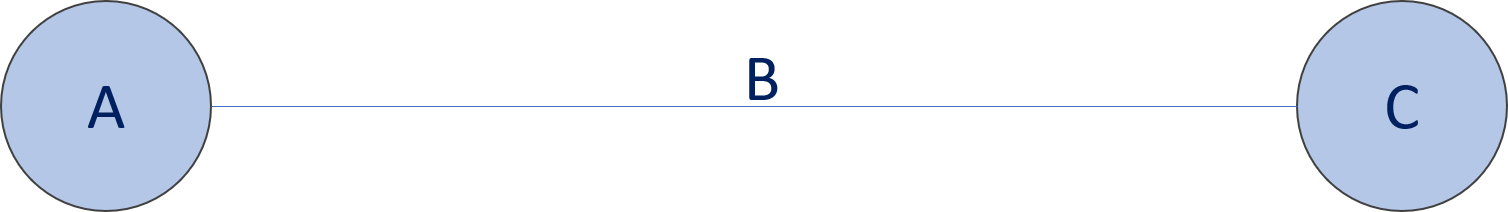

*A* represents the subject (**entity head**), *B* represents the predicate (**relation**), *C* represents the object (**entity tail**).

A KG for recommendations is obtained by firstly linking every **item in the offline dataset with the entity that rapresents the same item in a Knowledge Base**. For example, Inception from MovieLens dataset has a **corresponding entity** entry in DBpedia, and we are able to obtain its attribute information by reading out all its associated **relation triples in KBs.** A noteworthy work that performed this linkage is represented by [KB4Rec](https://github.com/RUCDM/KB4Rec).

This **linkage** is composed by linked ID pairs, which consists of a dataset item ID and a KB entity ID. As example:

                                           dataset_id knowledge base_id
                                           25991	m.09pglcq
                                           25993	m.0cjwhb
                                           25994	m.0k443
                                           25995	m.0b7kj8

So we can say that a KG is composed by 4 main components:
- 🔗 **Linkage**: Is the mapping between the items in the datasets (their IDs) and the corresponded KB entity (their KB ID)
- ⬛ **Set of entities** (nodes): Contains all the unique entities present in the triplets including item entities.
- ➡️ **Set of relations** (edges): Contains all the unique relations present in the triplets.
- ⬛ ➡️ ⬛ **Set of triplets** (the graph itself): Contains all the triplets of the form (entity head, relation, entity tail).

Again, since different KGs are **represented with different structures**,
 we will define a **KG standard format** which can be used to produce mapping for baselines.

![](https://drive.google.com/uc?id=1aCOiPTWoINk20_2h-ztxsKUoJs1O7eNi)

<a name="2"></a>
## 2 - Movielens 1M

---


<a name="2.1"></a>
### 2.1 - Dataset
This dataset is located under `data/ml1m`. This dataset has been directly downloaded from the [GroupLens website](https://grouplens.org/datasets/movielens/1m/).

#### Dataset Description



The dataset is composed by the following files:

- 👥 `data/ml1m/users.dat`: List of users and some demographical data.

- 📽 `data/ml1m/movies.dat`: Items catalog of movies and their metadata.

- ⭐ `data/ml1m/ratings.dat`: List of users' interactions with movies.

The files are composed by rows **separated by ::** that contain crucial and side-information for the recommendation task.

The rows are structured as follow:

![](https://drive.google.com/uc?id=1XL7z8OVEmRcN_DEvU5CXpN-c3x65kZiL)

*For more infos about the data format, please refer to the [official readme](https://files.grouplens.org/datasets/movielens/ml-1m-README.txt)*

#### Load and Visualize

Before starting let's save a variable with the path to the `data/ml1m/` in this way we can avoid repeating code.

In [ ]:
dataset_name = 'ml1m'
ml1m_path = f'data/{dataset_name}'

For this part and the following parts we will mainly rely on [Pandas DataFrames](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

> A Pandas a DataFrame **is a 2-dimensional labeled data structure** with columns of potentially different types. You can think of it **like a spreadsheet or SQL table, or a dict of Series objects**. It is generally the most commonly used pandas object.

Let's start by creating a **new DataFrame** using our  `ml1m/users.dat` data.

We can create a DataFrame **reading directly from a csv** using the `new_dataframe = pd.read_csv(filename, separator, name_of_columns, header)`




In [ ]:
ml1m_users_df = pd.read_csv(f'{ml1m_path}/users.dat', sep="::",
                            names=["UserID","Gender","Age","Occupation","Zip-code"],
                            header=None)
display(ml1m_users_df.head(5))
print(f"Unique Users: {len(ml1m_users_df)}")

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


Unique Users: 6040


Let's do now the same thing with the `ml1m/movies.dat` file.

In [ ]:
ml1m_movies_df = pd.read_csv(f'{ml1m_path}/movies.dat', sep="::",
                             names=["movie_id", "movie_name", "genre"],
                             header=None, encoding='latin-1')

display(ml1m_movies_df.head(5))
print(f"Unique Items: {len(ml1m_movies_df)}")

,movie_id,movie_name,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Unique Items: 3883


Finally, let's create another DataFrame using the `ml1m/ratings.dat` data.

In [ ]:
ml1m_ratings_df = pd.read_csv(f'{ml1m_path}/ratings.dat', sep="::",
                              names=["user_id", "movie_id", "rating", "timestamp"],
                              header=None)

display(ml1m_ratings_df.head(5))
print(f"Unique interactions: {len(ml1m_ratings_df)}")

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


Unique interactions: 1000209


<a name="2.2"></a>
### 2.2 - Knowledge Graph (KG)
In this section, you will learn the structure of the DBpedia KG.
This KG has been extracted by Cao et al. [[9]](#p9) for their [KTUP model](https://github.com/TaoMiner/joint-kg-recommender). This KG is stored under `data/raw_kg` and will be used in the processing as input to produce the final KG.

The preprocessed version used from us for our SIGIR22 paper [[32]](#p32) can be found in [our repository](https://github.com/giacoballoccu/explanation-quality-recsys).

#### KG Description

The DBpedia KG is compossed by 4 main files:

- `i2kg_map.tsv`: Mapping between the movielens dataset and the corresponding entity in the KG.

- `e_map.dat`: Set of entities.

- `r_map.dat`: Set of relations.

- `kg.dat`: Set of triplets *(entity_head, relation, entity_tail)*.

The files internally are structured as follow:


![](https://drive.google.com/uc?id=15-QwTg92wiUhrLRNfIk3K7MsjGviZ1Ka)

#### DBpedia KG

Let's start by loading the `data/ml1m/raw_kg/i2kg_map.tsv` into a new DataFrame, the fields this time are `["dataset_id", "movie_name", "entity_url"]`, again separated by `\t`

In [ ]:
raw_kg_ml1m_path = f'{ml1m_path}/raw_kg'

In [ ]:
movies_to_kg_df = pd.read_csv(f'{raw_kg_ml1m_path}/i2kg_map.tsv', sep="\t", names=["dataset_id", "movie_name", "entity_url"])

In [ ]:
display(movies_to_kg_df.head(5))
print(f"Items mapped in the KG: {movies_to_kg_df.shape[0]}")

,dataset_id,movie_name,entity_url
0,781,Stealing Beauty (1996),http://dbpedia.org/resource/Stealing_Beauty
1,1799,Suicide Kings (1997),http://dbpedia.org/resource/Suicide_Kings
2,521,Romeo Is Bleeding (1993),http://dbpedia.org/resource/Romeo_Is_Bleeding
3,3596,Screwed (2000),http://dbpedia.org/resource/Screwed_(2000_film)
4,3682,Magnum Force (1973),http://dbpedia.org/resource/Magnum_Force


Items mapped in the KG: 3300


Let's load the set of entites `data/mlm1/raw_kg/e_map.dat` into a new dataframe. The fields are `["entity_id", "entity_url"]` separated by `\t`

In [ ]:
entities_df = pd.read_csv(f'{raw_kg_ml1m_path}/e_map.dat', sep="\t", names=["entity_id", "entity_url"])
entities_df.head(5)

,entity_id,entity_url
0,0,http://dbpedia.org/resource/Roger_Carel
1,1,http://dbpedia.org/resource/Soundtrack_album
2,2,http://dbpedia.org/resource/1982_in_film
3,3,http://dbpedia.org/resource/Category:Films_set...
4,4,http://dbpedia.org/resource/Plaza_Hotel


From the **entity url**, you can access the page of the entity in the DBpedia knowledge base and you can read more about it and what are the relations that it has with other entities.

Let's load the `data/ml1m/raw_kg/kg.dat` file, which contains the triplets (entity head, entity tail, relation). This file has already an header so we don't need to manually specify it.

In [ ]:
kg_df = pd.read_csv(f'{raw_kg_ml1m_path}/kg.dat', sep="\t")
display(kg_df.head(5))
print(f"Number of triplets: {kg_df.shape[0]}")

,entity_head,entity_tail,relation
0,9386,4955,12
1,6851,1770,1
2,210,5210,8
3,4205,406,12
4,11533,12345,3


Number of triplets: 434189


Finally, let's load the `data/ml1m/raw_kg/r_map.dat` which contains the available relations of the KG. The fields are `["relation_id", "relation_url"]`, separated by `\t`.




In [ ]:
relations_df = pd.read_csv(f'{raw_kg_ml1m_path}/r_map.dat', sep="\t", names=["relation_id", "relation_url"])
relations_df

,relation_id,relation_url
0,0,http://dbpedia.org/ontology/cinematography
1,1,http://dbpedia.org/property/productionCompanies
2,2,http://dbpedia.org/property/composer
3,3,http://purl.org/dc/terms/subject
4,4,http://dbpedia.org/ontology/openingFilm
5,5,http://www.w3.org/2000/01/rdf-schema#seeAlso
6,6,http://dbpedia.org/property/story
7,7,http://dbpedia.org/ontology/series
8,8,http://www.w3.org/1999/02/22-rdf-syntax-ns#type
9,9,http://dbpedia.org/ontology/basedOn


Now, that we have loaded the raw dataset and KG let's go through the preprocessing steps necessary to ensure data coherence and standardize the dataset to be easily read from our libary.

<a name="2.3"></a>
### 2.3 - Preprocessing Dataset

#### Missing items in KG

A common problem when dealing with datasets augmented with knowledge graphs (KGs) is related to **missing links** between the **item in the dataset** and the **entities that represent that item in the KG**.  

These KGs are extracted querying for **a item (in the dataset)** and finding the  **entity that represent the same item (in the KG)**.

Sometimes, **this linking process fails** and we end up having some items **not mapped** with the KG. Consequently, we don't have side information about that item. Let's check if it's our case.

In [ ]:
print(f"Items in the original dataset: {ml1m_movies_df.shape[0]}")
print(f"Items correctly mapped in the KG: {movies_to_kg_df.shape[0]}")

Items in the original dataset: 3883
Items correctly mapped in the KG: 3300


Unfortunately, our KG has **some missing items** compared to our dataset 😔

As you can see from `item_to_kg_map` number of rows, this file contains **3301 unique movies**, which is less than the **3883 unique movies** originally present in the dataset `ml1m_movies_df`.

As  a workaround, what is usually done [[5,6,9]](#p5) is to **remove the items not matched** in the KG and **the ratings associated** to that item. This will result in a creation of a smaller dataset, is important for reproducibility purposes to use the same dataset when benchmarking on models that do not use the KG for fair comparison.

Let's remove from the `ml1m_movies_df` DataFrame the movies that are not in `item_to_kg_map`.

To do that, we will use the [`DataFrame.isin(values)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html) method to obtain a [Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) of boolean values that tells if the value is in the DataFrame.

```
ml1m_movies_df['movie_id'].isin(item_to_kg_map.dataset_id)
```

From that, using the [slicing](https://pandas.pydata.org/docs/user_guide/indexing.html), we can remove the rows where the `isin` has returned False, as follows:

```
ml1m_movies_df = ml1m_movies_df[ml1m_movies_df['movie_id'].isin(item_to_kg_map.dataset_id)]
```

Finally, we use [reset_index()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) to keep our index incrementally and our DataFrame nice and clean.

In [ ]:
number_of_movies = ml1m_movies_df.shape[0]
ml1m_movies_df = ml1m_movies_df[ml1m_movies_df['movie_id'].isin(movies_to_kg_df.dataset_id)]
ml1m_movies_df.reset_index()
display(ml1m_movies_df.head(5))
print(f"Number of rows removed due to missing links with KG: {number_of_movies - ml1m_movies_df.shape[0]}")

,movie_id,movie_name,genre
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller


Number of rows removed due to missing links with KG: 583


Also, we need to remove the items that are not present in the entities list `entities_df`. We can easily do it by merging the `movies_to_kg_df` and `entities_df` in a **joint DataFrame**. The items that **cannot be joined will be automatically discared**.

We can do that by using [Pandas.merge(dataframe1, dataframe2, on)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).

*Note: This function behaves exactly like a join in SQL, the `dataframe1` is the first table, the `dataframe2` is the second, and the `on` defines the key on where to perfom the join.*

In [ ]:
movies_to_kg_df = pd.merge(movies_to_kg_df, entities_df, on=["entity_url"])
display(movies_to_kg_df.head(5))
print(f"Correctly mapped items: {movies_to_kg_df.shape[0]}")

,dataset_id,movie_name,entity_url,entity_id
0,781,Stealing Beauty (1996),http://dbpedia.org/resource/Stealing_Beauty,5474
1,1799,Suicide Kings (1997),http://dbpedia.org/resource/Suicide_Kings,9337
2,521,Romeo Is Bleeding (1993),http://dbpedia.org/resource/Romeo_Is_Bleeding,8520
3,3596,Screwed (2000),http://dbpedia.org/resource/Screwed_(2000_film),4713
4,3682,Magnum Force (1973),http://dbpedia.org/resource/Magnum_Force,14676


Correctly mapped items: 3265


In [ ]:
print(f"Movies before: {ml1m_movies_df.shape[0]}")
movies_to_kg_df = movies_to_kg_df[movies_to_kg_df.entity_id.isin(entities_df.entity_id)]
print(f"Number of rows removed due to missing entity data in KG: {movies_to_kg_df.shape[0]}")

Movies before: 3300
Number of rows removed due to missing entity data in KG: 3265


Since we have removed the movies from the `ml1m_movies_df`, we need to **propagate** this change also in the `ml1m_ratings_df`.

Let's do that by using the same code as before, but changing the DataFrame and fields accordingly.

In [ ]:
number_of_ratings = ml1m_ratings_df.shape[0]
ml1m_ratings_df = ml1m_ratings_df[ml1m_ratings_df['movie_id'].isin(movies_to_kg_df.dataset_id)]
ml1m_ratings_df.reset_index()
display(ml1m_ratings_df.head(5))
print(f"Number of interactions lost because involve a removed movie: {number_of_ratings - ml1m_ratings_df.shape[0]}")

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


Number of interactions lost because involve a removed movie: 58914


✅ We are done! Let's see another preprocessing

#### Reducing a dataset to its k-core (Threshold Discarding)

Another useful preprocessing tecniques is represented by **reducing the dataset to its k-core** [[3]](#p3). This technique is used when dealing with datasets which are **very sparse** or have a very **few number of ratings per user**.

This is done by fixing a **threshold** *k* and by discarding the items and/or users that occour less than *k* times in the ratings.

1. Initially, we create two masks based on the criteria that each user and each item should appear at least k times in the dataset. These masks are Boolean arrays where each position corresponds to a row in the original DataFrame, and the value is True if the condition (user or item appears at least k times) is met.

        users_to_keep = user_counts[user_counts >= k].index
        items_to_keep = item_counts[item_counts >= k].index

2. Next, we apply both masks to the DataFrame simultaneously to retain only the rows where both the user and the item meet the minimum appearance threshold. This is done by combining the masks with a logical AND operation, ensuring that both conditions (for users and items) are satisfied for a row to be included in the filtered dataset.

3. Since removing some users and items can affect the counts of appearances for others, this process is repeated iteratively. After each iteration, we check if the size of the DataFrame has changed. If it hasn't, it means we've reached a stable state where all users and items in the DataFrame appear at least k times, and the process can be stopped.

In [ ]:
print(f"Number of ratings before: {ml1m_ratings_df.shape[0]}")

k = 5

# K-core decomposition process
while True:
    # Count how many times each user and item appears
    user_counts = ml1m_ratings_df['user_id'].value_counts()
    item_counts = ml1m_ratings_df['movie_id'].value_counts()

    # Filter users and items that appear at least k times
    users_to_keep = user_counts[user_counts >= k].index
    items_to_keep = item_counts[item_counts >= k].index

    # Filter the DataFrame
    new_df = ml1m_ratings_df[ml1m_ratings_df['user_id'].isin(users_to_keep) & ml1m_ratings_df['movie_id'].isin(items_to_keep)]

    # Check if the filtering changed the DataFrame size
    if new_df.shape[0] == ml1m_ratings_df.shape[0]:
        break  # Exit the loop if no changes were made
    ml1m_ratings_df = new_df

# Resulting DataFrame after k-core decomposition
print(f"Number of ratings after: {ml1m_ratings_df.shape[0]}")
ml1m_ratings_df.head(5)

Number of ratings before: 941295
Number of ratings after: 940953


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


We need to propagate these changes on `ml1m_users_df` and `ml1m_movies_df`. Let's remove the users and movies that aren't anymore in our `ml1m_ratings_df`

In [ ]:
print(f"Number of users before threshold discarding (k={k}): {ml1m_users_df.shape[0]}")
ml1m_users_df = ml1m_users_df[ml1m_users_df.UserID.isin(ml1m_ratings_df.user_id.unique())]
print(f"Number of users after threshold discarding (k={k}): {ml1m_users_df.shape[0]}")

Number of users before threshold discarding (k=5): 6040
Number of users after threshold discarding (k=5): 6040


In this case, **no user has been removed**, so the dataset in dense enough for our goal.

In [ ]:
print(f"Number of items before threshold discarding (k={k}): {ml1m_movies_df.shape[0]}")
ml1m_movies_df = ml1m_movies_df[ml1m_movies_df.movie_id.isin(ml1m_ratings_df.movie_id.unique())]
print(f"Number of items after threshold discarding (k={k}): {ml1m_movies_df.shape[0]}")

Number of items before threshold discarding (k=5): 3300
Number of items after threshold discarding (k=5): 3029


We have removed some items! **Remember that every change done to the items in the dataset will also affect the KG**; you need to propagate the change by removing the items from `entities_df`, `movies_to_kg_df` and `kg_df` accordingly.

To do this, we will leverage the `propagate_item_removal_to_kg` function from our `knowledge_graph_utils` module.

In [ ]:
from knowledge_graph_utils import propagate_item_removal_to_kg
movies_to_kg_df, entities_df, kg_df = propagate_item_removal_to_kg(ml1m_movies_df, movies_to_kg_df, entities_df, kg_df)

Removed 236 entries from i2kg map.
Removed 236 entries from e_map
Removed 11916 triplets from kg_df


✅ We are done! Let's save our proprocessed dataset in the Standard Format!

<a name="2.4"></a>
### 2.4 - Saving preprocessed dataset in Standard Format

Recall, from Section 1.1, that we want **all the datasets** to be formatted **in the same structure**.

![](https://drive.google.com/uc?id=1vd3HmCs0fcU6hlZDjGt67SAupmAcCNog)

This is crucial to use **our mappers (Part 2)** and **convert the datasets** to a version **readable by different models**.

Let's **save** our preprocessed dataset in the **standard format** into `data/ml1m`. This file will be later used by the `finalise_dataset.py` script that will ensure congruence between the KG and dataset and save the final version into `'data/ml1m/preprocessed'`

In [ ]:
ml1m_preprocessed_path = os.path.join(ml1m_path, 'preprocessed')
if not os.path.exists(ml1m_preprocessed_path):
    os.mkdir(ml1m_preprocessed_path)

#### Users file

As first thing, we need to **remove** the columns that carry **addtional data** that **we not need** for now. In our case, we drop the Occupation, and Zip-Code columns.

Using the `DataFrame.drop(values, axis)`, we can remove the columns that are not of interest. We need to specify the list of values, which are the columns that we want to drop, in our case `["Occupation", "Zip-code"]` and the `axis=1` since we want to drop columns. We keep `["Gender", "Age"]` since they could be useful to measure consumer fairness metrics

In [ ]:
ml1m_users_df = ml1m_users_df.drop(["Occupation", "Zip-code"], axis=1)
ml1m_users_df.head(5)

,UserID,Gender,Age
0,1,F,1
1,2,M,56
2,3,M,25
3,4,M,45
4,5,M,25


The DataFrame is now exacly in the **standardized format** we wanted. Let's save it by using the `DataFrame.to_csv(filename, header, index, sep, mode)`. Let's save it in `ml1m/preprocessed/users.txt`, the headers are `["new_id", "raw_dataset_id"]`, for the index we specify `False` since we already added the `new_id` manually, as separator `\t` and as mode `w+`.

In [ ]:
columns_names_map = {"UserID": "uid", "Gender": "gender", "Age": "age"} # Standardize column names
column_order = list(columns_names_map.values())
ml1m_users_df.rename(columns_names_map, axis=1, inplace=True)
ml1m_users_df = ml1m_users_df[column_order] # Standardize column order
ml1m_users_df.to_csv(f'{ml1m_preprocessed_path}/users.txt',
                     index=False, sep='\t', mode='w+')

✅ Now, we have our preprocessed and standardized `users.txt` file.

#### Movies file

We do the same for the `products.txt` file, using the `ml1m_movies_df` DataFrame.


In [ ]:
columns_map = {"movie_id": "pid", "movie_name": "name", "genre": "genre"} # Standardize column names
column_order = list(columns_map.values())
ml1m_movies_df.rename(columns_map, axis=1, inplace=True)
ml1m_movies_df = ml1m_movies_df[column_order] # Standardize column order
ml1m_movies_df.to_csv(f'{ml1m_preprocessed_path}/products.txt', index=False, sep='\t', mode='w+')
ml1m_movies_df.head(5)

,pid,name,genre
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller


#### Ratings

In [ ]:
#Save ratings
header = ["uid", "pid", "rating", "timestamp"]
ml1m_ratings_df.columns = header
ml1m_ratings_df.to_csv(f'{ml1m_preprocessed_path}/ratings.txt', index=False, sep='\t', mode='w+')

<a name="2.5"></a>
### 2.5 - Preprocessing the KG

#### Cleaning wrong formated triplets

Among the triplets, we are only interested in those that involve a **relation between** a entity head (**product**) and an entity tail that is an **external entity**. The triplets may contain relations that involve **product to product** or **entity to entity relations**. We want to **discard them**, since they may create **problems in defining meta-paths** for our algorithms (we will see more about it later).

In this preprocessing, we will get rid of them. 😎

Recall that we previosuly merged the `m1lm_movies_df` with the `entities_df` dataframe. We will use this unified dataframe in this step.

In [ ]:
display(movies_to_kg_df.head(5))
print(f"Number of movies correctly mapped: {movies_to_kg_df.shape[0]}")

,dataset_id,movie_name,entity_url,entity_id
0,781,Stealing Beauty (1996),http://dbpedia.org/resource/Stealing_Beauty,5474
1,1799,Suicide Kings (1997),http://dbpedia.org/resource/Suicide_Kings,9337
2,521,Romeo Is Bleeding (1993),http://dbpedia.org/resource/Romeo_Is_Bleeding,8520
3,3596,Screwed (2000),http://dbpedia.org/resource/Screwed_(2000_film),4713
4,3682,Magnum Force (1973),http://dbpedia.org/resource/Magnum_Force,14676


Number of movies correctly mapped: 3029


Now we can keep in `kg_df` only the rows that respect these two conditions:
- The entity head **must be** a movie (so in `movies_to_kg_df`)
- The entity tail **must not be** a movie (so not in `movies_to_kg_df`)

*Note: To write this condition, we need to use the pandas & **(and)** and ~ **(not)**.*

Firstly let's swap the triplets that are formatted as **entity_head (external entity)**, **entity_tail (item)**, **relation**.

In [ ]:
mask = kg_df['entity_tail'].isin(movies_to_kg_df.entity_id) \
        & ~kg_df['entity_head'].isin(movies_to_kg_df.entity_id)
print(f"Swapped triplets {mask.sum()}")
kg_df.loc[mask, ['entity_head', 'entity_tail']] = \
    (kg_df.loc[mask, ['entity_tail', 'entity_head']].values)

Swapped triplets 124998


Now let's remove the invalid **product to product** or **entity to entity** triplets.

In [ ]:
n_of_triplets = kg_df.shape[0]
kg_df = kg_df[(kg_df['entity_head'].isin(movies_to_kg_df.entity_id) & ~kg_df['entity_tail'].isin(movies_to_kg_df.entity_id))]
display(kg_df.head(5))
print(f"Number of triplets before: {n_of_triplets}")
print(f"Number of triplets after: {kg_df.shape[0]}")

,entity_head,entity_tail,relation
0,9386,4955,12
1,6851,1770,1
2,210,5210,8
3,4205,406,12
4,11533,12345,3


Number of triplets before: 422273
Number of triplets after: 409887


Let's see, after this removal, if we have lost some relations among the **20 originally available**.

In [ ]:
len(kg_df.relation.unique())

20

All relations still exist in our `kg_df`!

*Note: In case we lose some relations, we need to update consequently the `r_map.dat` file.*

✅ Done! Let's see how to preprocess the relations.

#### Selecting relations

Similar to what we have done reducing the dataset to its **k-core** in [Section 2.3](#2.3), we can make the **KG more dense discarding relations or entities** that appear less than *k* times. Let's discard relations that appear **less that 300 times** in our triplets!

*Note: k has been chosen to be 0.01% of the total triplets*

In [ ]:
v = kg_df[['relation']]
n_of_triplets = kg_df.shape[0]
kg_df = kg_df[v.replace(v.apply(pd.Series.value_counts)).gt(300).all(1)]
display(kg_df.head(5))
print(f"Number of triplets before: {n_of_triplets}")
print(f"Number of triplets after: {kg_df.shape[0]}")

,entity_head,entity_tail,relation
0,9386,4955,12
1,6851,1770,1
2,210,5210,8
3,4205,406,12
4,11533,12345,3


Number of triplets before: 409887
Number of triplets after: 409477


In [ ]:
len(kg_df.relation.unique())

13

During the last two preprocessings, we discarded some triplets. Let's update our `relations_df` **keeping only the relations** that are **currently in our** `kg_df` and save them in `r_map_filtered.dat`

In [ ]:
print(f"Unique relations before: {relations_df.shape[0]}")
relations_df = relations_df[relations_df['relation_id'].isin(kg_df.relation.unique())]
relations_df.reset_index()
relations_df

Unique relations before: 20


,relation_id,relation_url
0,0,http://dbpedia.org/ontology/cinematography
1,1,http://dbpedia.org/property/productionCompanies
2,2,http://dbpedia.org/property/composer
3,3,http://purl.org/dc/terms/subject
8,8,http://www.w3.org/1999/02/22-rdf-syntax-ns#type
10,10,http://dbpedia.org/ontology/starring
11,11,http://dbpedia.org/ontology/country
12,12,http://dbpedia.org/ontology/wikiPageWikiLink
13,13,http://purl.org/linguistics/gold/hypernym
14,14,http://dbpedia.org/ontology/editing


We also want to manually remove relations that **don't make sense semantically**. For example [http://www.w3.org/1999/02/22-rdf-syntax-ns#type](http://www.w3.org/1999/02/22-rdf-syntax-ns#type) and [http://purl.org/linguistics/gold/hypernym](http://purl.org/linguistics/gold/hypernym) connects a `movie` to its `rdf type` which is in all the triplets `film`.

*Note: This step has been done because our model will produce explanations path and we want them to be semantically valid for an user explanation*


In [ ]:
relations_df = relations_df[(relations_df['relation_id'] != 13) & (relations_df['relation_id'] != 8)]
relations_df

,relation_id,relation_url
0,0,http://dbpedia.org/ontology/cinematography
1,1,http://dbpedia.org/property/productionCompanies
2,2,http://dbpedia.org/property/composer
3,3,http://purl.org/dc/terms/subject
10,10,http://dbpedia.org/ontology/starring
11,11,http://dbpedia.org/ontology/country
12,12,http://dbpedia.org/ontology/wikiPageWikiLink
14,14,http://dbpedia.org/ontology/editing
15,15,http://dbpedia.org/property/producers
16,16,http://dbpedia.org/property/allWriting


We also propagate this change in `e_map` and `kg_df`.

In [ ]:
print(f"Triplets before: {kg_df.shape[0]}")
kg_df = kg_df[kg_df.relation.isin(relations_df.relation_id)]
print(f"Triplets after: {kg_df.shape[0]}")

Triplets before: 409477
Triplets after: 323499


In [ ]:
print(f"Entities before: {entities_df.shape[0]}")
entities_df = entities_df[entities_df.entity_id.isin(kg_df.entity_head) | entities_df.entity_id.isin(kg_df.entity_tail)]
print(f"Entities after: {entities_df.shape[0]}")

Entities before: 14472
Entities after: 13804


In [ ]:
print(f"Products before: {movies_to_kg_df.shape[0]}")
movies_to_kg_df = movies_to_kg_df[movies_to_kg_df.entity_id.isin(entities_df.entity_id)]
print(f"Products after: {movies_to_kg_df.shape[0]}")

Products before: 3029
Products after: 2983


As said before when a processing influences the number of items we need to propagate this changes to `preprocessed/products.txt` and `preprocessed/ratings.txt`

In [ ]:
ml1m_movies_df = ml1m_movies_df[ml1m_movies_df.pid.isin(movies_to_kg_df.dataset_id)]
ml1m_movies_df.to_csv(f'{ml1m_preprocessed_path}/products.txt', index=False, sep='\t', mode='w+')

In [ ]:
ml1m_ratings_df = ml1m_ratings_df[ml1m_ratings_df.pid.isin(ml1m_movies_df.pid)]
ml1m_ratings_df.to_csv(f'{ml1m_preprocessed_path}/ratings.txt', index=False, sep='\t', mode='w+')

<a name="2.6"></a>
### 2.6 - Saving preprocessed KG in Standard Format

Recall from [Section 1.2](#1.2) that we want **all the datasets** to be formatted **in the same structure**.

![](https://drive.google.com/uc?id=1aCOiPTWoINk20_2h-ztxsKUoJs1O7eNi)

It is crucial to use **our mappers** (we will see them in part 2) and **convert the KG** to a version **readable by different models**.

Let's **save** our preprocessed KG in the **standard format** into `data/ml1m/kg`. This will be later used by a script to finalise the KG making all the ids incremental.

In [ ]:
ml1m_preprocessed_kg_path = 'data/ml1m/kg/'
if not os.path.exists(ml1m_preprocessed_kg_path):
    os.mkdir(ml1m_preprocessed_kg_path)

Let's save the preprocessed relations in a new `r_map.txt` file.

In [ ]:
display(relations_df)
relations_df.to_csv(f'{ml1m_preprocessed_kg_path}/r_map.txt', index=False, sep='\t', mode='w+')

,relation_id,relation_url
0,0,http://dbpedia.org/ontology/cinematography
1,1,http://dbpedia.org/property/productionCompanies
2,2,http://dbpedia.org/property/composer
3,3,http://purl.org/dc/terms/subject
10,10,http://dbpedia.org/ontology/starring
11,11,http://dbpedia.org/ontology/country
12,12,http://dbpedia.org/ontology/wikiPageWikiLink
14,14,http://dbpedia.org/ontology/editing
15,15,http://dbpedia.org/property/producers
16,16,http://dbpedia.org/property/allWriting


Let's do the same for the `e_map.txt` file.

In [ ]:
display(entities_df.head(5))
entities_df.to_csv(f'{ml1m_preprocessed_kg_path}/e_map.txt', index=False, sep='\t', mode='w+')

,entity_id,entity_url
0,0,http://dbpedia.org/resource/Roger_Carel
1,1,http://dbpedia.org/resource/Soundtrack_album
2,2,http://dbpedia.org/resource/1982_in_film
3,3,http://dbpedia.org/resource/Category:Films_set...
4,4,http://dbpedia.org/resource/Plaza_Hotel


Save the `i2kg_map.txt`.

In [ ]:
display(movies_to_kg_df.head(2))
movies_to_kg_df.to_csv(f'{ml1m_preprocessed_kg_path}/i2kg_map.txt', index=False, sep='\t', mode='w+')

,dataset_id,movie_name,entity_url,entity_id
0,781,Stealing Beauty (1996),http://dbpedia.org/resource/Stealing_Beauty,5474
1,1799,Suicide Kings (1997),http://dbpedia.org/resource/Suicide_Kings,9337


And finally `kg_final.txt`.

In [ ]:
display(kg_df.head(5))
kg_df.to_csv(f'{ml1m_preprocessed_kg_path}/kg_final.txt', index=False, sep='\t', mode='w+')

,entity_head,entity_tail,relation
0,9386,4955,12
1,6851,1770,1
3,4205,406,12
4,11533,12345,3
5,2075,7182,12


With all the files in standard format we will now finalise our KG and saving it in the `preprocessed` folder using the `finalise_dataset.py` script that will:
- Remap relations to have incremental ids from 0 to `n_relations`
- Remap entities to have incremental ids from 0 to `n_entities`
- Remove triplets and entities that have incoherent semantics making entities that are associated to multiple relation types to be associated just to one relation type

In [ ]:
! python finalise_kg.py --data {dataset_name}

Removed 117574 triplets


In [ ]:
! ls {ml1m_preprocessed_path}

cafe	   i2kg_map.txt  mapping  products.txt	r_map.txt  token_index.txt  users.txt
e_map.txt  kg_final.txt  pgpr	  ratings.txt	test.txt   train.txt	    valid.txt


Let's see what are the relations ids after this

In [ ]:
! cat {ml1m_preprocessed_path}'/r_map.txt'

id	kb_relation	name
0	http://dbpedia.org/ontology/cinematography	cinematography_by_cinematographer
1	http://dbpedia.org/property/productionCompanies	produced_by_prodcompany
2	http://dbpedia.org/property/composer	composed_by_composer
3	http://purl.org/dc/terms/subject	belong_to_category
4	http://dbpedia.org/ontology/starring	starred_by_actor
5	http://dbpedia.org/ontology/country	produced_in_country
6	http://dbpedia.org/ontology/editing	edited_by_editor
7	http://dbpedia.org/property/producers	produced_by_producer
8	http://dbpedia.org/property/allWriting	wrote_by_writter
9	http://dbpedia.org/ontology/director	directed_by_director
10	http://dbpedia.org/ontology/wikiPageWikiLink	related_to_wikipage


✅ Done! Let's create our training split.

### 2.7 Training Split

---


In this tutorial, we will create a **time-based user-based split**, this means that every user (user-based) has **the first n_train ratings sorted by timestamp** (time-based) in train and the others in the test set.

This splitting method aims to evaluate **every user** and takes into consideration the **time of the interaction**.

Do do that we can use the `time_based_train_test_split` from our `data_utils` module. We will use for coherence with our previous work a 60/20/20 train/valid/text split

In [ ]:
from data_utils import time_based_train_test_split

time_based_train_test_split('ml1m', 0.6, 0.2)

Let's quickly explore some of them. `train.txt`, `valid.txt` and `test.txt` keep the same format as the original `ratings.txt` from where have been derived

In [ ]:
! head -5 'data/ml1m/preprocessed/train.txt'

1	3186	1	978300019
1	1270	1	978300055
1	1721	1	978300055
1	1022	1	978300055
1	2340	1	978300103


### 2.8 Data enrichment
---

Our data enrichment consists in:
- Normalise the age ranges
- Add items and associated provider popularity to items

In [ ]:
from data_utils import categorize_uses_age

display(ml1m_users_df.head(5))
categorize_uses_age(dataset_name)
ml1m_users_df = pd.read_csv(f'{ml1m_preprocessed_path}/users.txt', sep="\t")
display(ml1m_users_df.head(5))

,uid,gender,age
0,1,F,1
1,2,M,56
2,3,M,25
3,4,M,45
4,5,M,25


,uid,gender,age
0,1,F,Under 18
1,2,M,56+
2,3,M,25-34
3,4,M,45-49
4,5,M,25-34


Since in this tutorial we will evaluate utility and **beyond utility metrics** of the showcased methods. To do this we need additional metadata for products. For example we want to know how popular is an item or a provider with respect to the training data. Let's add to items and associated provider their popularity with respect to the train set.

In [ ]:
from data_utils import add_products_metadata

display(ml1m_movies_df.head(5))
add_products_metadata(dataset_name)
ml1m_movies_df = pd.read_csv(f'{ml1m_preprocessed_path}/products.txt', sep="\t")
display(ml1m_movies_df.head(5))

,pid,name,genre
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller


,pid,name,provider_id,genre,pop_item,pop_provider
0,2,Jumanji (1995),4945,Adventure|Children's|Fantasy,0.087379,0.087745
1,3,Grumpier Old Men (1995),26502,Comedy|Romance,0.688974,0.057208
2,4,Waiting to Exhale (1995),2178,Comedy|Drama,0.367892,0.016802
3,5,Father of the Bride Part II (1995),56106,Comedy,0.100902,0.008534
4,6,Heat (1995),638,Action|Crime|Thriller,0.064147,0.126150


✅ We are done with Part 1 for this dataset!

<a name="3"></a>
## 3 - Last.FM 1M

---

<a name="3.1"></a>
### 3.1 Dataset

This dataset is located under `data/lfm1m`. The [LFM1M dataset](https://github.com/giacoballoccu/LFM1M-Recommendation-dataset-with-sensible-attributes) has been obtained as a randomly extracted subset of users and songs constrained to have a size of 1M from the original [Last.FM 1 Billion dataset](http://www.cp.jku.at/datasets/LFM-1b/) [[2]](#p2).

*Note: This dataset has been already processed in our [ECIR23 work](https://github.com/giacoballoccu/rep-path-reasoning-recsys/tree/main) to be in standard format by performing the previous steps. So we will not perform the previously showed preprocessing.*

#### Dataset Description

The dataset is composed by the following files:

- 👥 `data/lfm1m/preprocessed/users.txt`: List of users and some demographical data.

- 📀 `data/lfm1m/preprocessed/tracks.txt`: Items catalog of songs and associated artists.

- ⭐ `data/lfm1m/preprocessed/ratings.txt`: List of users' positive interactions with songs.

The files are composed by rows **separated by** `\t` that contain crucial and side-information for the recommendation task.

The rows are structured as follow:

![](https://drive.google.com/uc?id=1p2FV_3mKuQe6R4R74AOUADNGtAvBfjkG)

Last.FM 1M (LFM1M) is a reduced version of the Last.FM 1B dataset. It has been obtained reducing the original dataset to a random set that respect the k-core property with k=10. Recall:

> *A dataset reduced to its K-cores (i.e., dense subsets) is a subset with removed items and users, such that each of the remaining users and items have k reviews each.*

The **original dataset** can be used to perform different tasks, such as album recommendation, artist recommendation, and track recommendation. In our context, we will focus on the **track recommendation task**.

Since this dataset is already preprocessed! We will just load the data, visualize it's content, and print some stats.

#### Load and visualize

Before starting, let's save a variable with the path to the `data/lfm1m/`; in this way, we can avoid repeating code.

In [ ]:
lfm1m_path = 'data/lfm1m/preprocessed'

Let's load into a dataframe the users and visualize them.

In [ ]:
lastfm_users_df = pd.read_csv(f"{lfm1m_path}/users.txt", sep="\t")
display(lastfm_users_df.head(5))
print(f"Number of users: {lastfm_users_df.shape[0]}")

,uid,age,gender
0,1003134,25-34,M
1,1003798,25-34,M
2,1005261,25-34,M
3,1008023,25-34,M
4,1010145,25-34,M


Number of users: 4817


Doing the same for the tracks.

In [ ]:
lastfm_songs_df = pd.read_csv(f"{lfm1m_path}/products.txt", sep="\t")
display(lastfm_songs_df.head(5))
print(f"Number of tracks: {lastfm_songs_df.shape[0]}")

,pid,name,provider_id,genre,pop_item,pop_provider
0,3,Up the Downstair,4,39,0.851852,0.211500
1,8,Tornado Of Souls,1,12,0.048733,0.224167
2,64,The End of the Beginning,25,1261,0.076023,0.205238
3,72,Brand New Start,12,68,0.115010,0.056220
4,81,I Drive the Hearse,4,39,0.085770,0.211500


Number of tracks: 12492


And the ratings. Differently from the original ML1M, you can see that these ratings are expressed as **implicit feedback**.

In [ ]:
lastfm_ratings_df = pd.read_csv(f"{lfm1m_path}/ratings.txt", sep="\t")
display(lastfm_ratings_df.head(5))
print(f"Number of ratings: {lastfm_ratings_df.shape[0]}")

,uid,pid,feedback,timestamp
0,21072247,8,1,1375958058
1,21072247,101,1,1375113570
2,21072247,117,1,1374771673
3,21072247,125,1,1374670722
4,21072247,181,1,1374570144


Number of ratings: 1091274


<a name="3.2"></a>
### 3.2 Knowledge Graph (KG)


This KG is located under `data/lfm1m/preprocessed`. It was extracted from Freebase [[7]](#p7) and created by Zhao et. al. [[8]](#p8) from their proposed [KG extractor method](https://github.com/RUCDM/KB4Rec). We produced a subset according to the items present in the LFM1M dataset.

#### KG description

The Freebase KG is composed of 4 main files:

- `i2kg_map.tsv`: Mapping between the Last.FM dataset and the corresponding entity in the KG.

- `e_map.txt`: Set of entities.

- `r_map.txt`: Set of relations.

- `kg.txt`: Set of triplets *(entity_head, relation, entity_tail)*.

The files, internally, are structured as follows:

![](https://drive.google.com/uc?id=1Qy5tWRLNIoiI9Hr8aryYaMtu5yjZXLlY)

#### Freebase KG

**Every item in this subset is linked to the correspondent entity** in the KG. Consequently, we don't have to perform additional preprocessing. For LFM1M, we only to show the KG stats.

First the item mapping to the kg `i2kg_map.txt`.

In [ ]:
songs_to_kg_df = pd.read_csv(f"{lfm1m_path}/i2kg_map.txt", sep="\t")
display(songs_to_kg_df.head(5))
print(f"Number of songs mapped to KG: {songs_to_kg_df.shape[0]}")

,eid,pid,name,entity
0,0,3,Up the Downstair,m.0twntz
1,1,8,Tornado Of Souls,m.0xt3h5
2,2,64,The End of the Beginning,m.0ftd33x
3,3,72,Brand New Start,m.0dnh50s
4,4,81,I Drive the Hearse,m.0dv3tc3


Number of songs mapped to KG: 12492


Then the entity list `e_map.txt`.

In [ ]:
entities_df = pd.read_csv(f"{lfm1m_path}/e_map.txt", sep="\t")
display(entities_df.head(5))
print(f"Number of entities in the KG: {entities_df.shape[0]}")

,eid,name,entity
0,0,Up the Downstair,m.0twntz
1,1,Tornado Of Souls,m.0xt3h5
2,2,The End of the Beginning,m.0ftd33x
3,3,Brand New Start,m.0dnh50s
4,4,I Drive the Hearse,m.0dv3tc3


Number of entities in the KG: 17491


Then the KG triplets `kg_final.txt`.

In [ ]:
kg_df = pd.read_csv(f"{lfm1m_path}/kg_final.txt", sep="\t")
display(kg_df.head(5))
print(f"Number of triplets in the KG: {kg_df.shape[0]}")

,entity_head,relation,entity_tail
0,6663,0,12492
1,6079,0,12493
2,95,0,12494
3,6422,0,12496
4,5641,0,12498


Number of triplets in the KG: 230145


And the relations `r_map.txt`.

In [ ]:
relations_df = pd.read_csv(f"{lfm1m_path}/r_map.txt", sep="\t")
relations_df

,id,kb_relation,name
0,0,<http://rdf.freebase.com/ns/music.recording.ar...,featured_by_artist
1,1,<http://rdf.freebase.com/ns/music.recording.en...,mixed_by_engineer
2,2,<http://rdf.freebase.com/ns/music.recording.pr...,produced_by_producer
3,3,<http://rdf.freebase.com/ns/music.recording.ge...,belong_to_genre


<a name="4"></a>
## 4 - Amazon CellPhones

---

This is the **5-core dense subset** downloaded from the original [Amazon Review Data Collections (2018)](https://nijianmo.github.io/amazon/index.html) [[38]](#p38) , which can be downloaded [here](http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Cell_Phones_and_Accessories_5.json.gz). This collection includes many category-based datasets.

<a name="4.1"></a>
### 4.1 - Dataset

---

#### Dataset description

The dataset is composed by a single file:

- 📦 `data/cellphones/Cell_Phones_and_Accessories_5.json`: List of users item interactions expressed with a rating between 0-5 and a textual review. It contains a lot of metadata about the interaction.

The file is a `.json` file structured as follow:

![](https://drive.google.com/uc?id=19UmwQ3IPXb2XhZWfLcCwOexV6M_Jvv_Q)

#### Load and visualize

In [ ]:
dataset_name = 'cell'
cell_path = f'data/{dataset_name}'

To load the data as dataframe let's use `get_dataframe_from_json(filename)` from the `utils` module.

⏱️ ~30 seconds.

In [ ]:
from utils import get_dataframe_from_json
cell_df = get_dataframe_from_json(f"{cell_path}/Cell_Phones_and_Accessories_5.json.gz")

We can now take a look to the dataset and check its properties.

In [ ]:
display(cell_df.head(5))
print(f"Number of unique users: {cell_df.reviewerID.unique().shape[0]}")
print(f"Number of unique products: {cell_df.asin.unique().shape[0]}")
print(f"Number of interactions: {cell_df.shape[0]}")

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"08 4, 2014",A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN
1,5.0,True,"02 12, 2014",A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN
2,3.0,True,"02 8, 2014",AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN
3,2.0,True,"02 4, 2014",A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN
4,4.0,True,"02 3, 2014",A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN


Number of unique users: 157212
Number of unique products: 48186
Number of interactions: 1128437


Since for Cellphones we have to create the KG from the item metadata, **we need to proprocess the dataset first** and then to create the KG.

<a name="4.2"></a>
### 4.2 - Preprocessing Dataset

---

#### Removing unuseful attributes

As a first preprocessing step, we will **remove the ratings** produced by users that are **not verified**. This will make our data cleaner and increase the chance we are not considering **fake reviews**.

In [ ]:
n_of_interactions = cell_df.shape[0]
cell_df = cell_df[cell_df.verified == True]
print(f"Number of interactions before: {n_of_interactions}")
print(f"Number of interactions (removing the ones done by unverified users): {n_of_interactions - cell_df.shape[0]}")

Number of interactions before: 1128437
Number of interactions (removing the ones done by unverified users): 141113


Let's perform more cleaning. We can see all the **columns of the dataframe** by accessing the attribute columns, with `DataFrame.columns`.

In [ ]:
cell_df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')

We are not going to use all this data. So **let's remove some columns** that are not useful for our purposes. In particular, we would like to discard the `['verified', 'reviewTime', 'style', 'reviewerName', 'reviewText', 'summary', 'vote', 'image' columns]`.

In [ ]:
cell_df = cell_df.drop(['verified', 'reviewTime', 'style', 'reviewerName', 'reviewText', 'summary', 'vote', 'image'], axis=1)

In [ ]:
print(f"Unique interactions: {cell_df.shape[0]}")
cell_df.head(5)

Unique interactions: 987324


,overall,reviewerID,asin,unixReviewTime
0,5.0,A24E3SXTC62LJI,7508492919,1407110400
1,5.0,A269FLZCB4GIPV,7508492919,1392163200
2,3.0,AB6CHQWHZW4TV,7508492919,1391817600
3,2.0,A1M117A53LEI8,7508492919,1391472000
4,4.0,A272DUT8M88ZS8,7508492919,1391385600


Much better now!🤗


#### Reducing to k-core (Threshold Discarding)

Again, we are going to perform a **threshold discarding**, we will do this to reduce the scale of the dataset. This time we will use `k=7` for users and items.

In [ ]:
print(f"Users before: {cell_df.reviewerID.unique().shape[0]}")
print(f"Products before: {cell_df.asin.unique().shape[0]}")
print(f"Number of interaction before: {cell_df.shape[0]}")

k = 7

# K-core decomposition process
while True:
    # Count how many times each user and item appears
    user_counts = cell_df['reviewerID'].value_counts()
    item_counts = cell_df['asin'].value_counts()

    # Filter users and items that appear at least k times
    users_to_keep = user_counts[user_counts >= k].index
    items_to_keep = item_counts[item_counts >= k].index

    # Filter the DataFrame
    new_df = cell_df[cell_df['reviewerID'].isin(users_to_keep) \
    & cell_df['asin'].isin(items_to_keep)]

    # Check if the filtering changed the DataFrame size
    if new_df.shape[0] == cell_df.shape[0]:
        break  # Exit the loop if no changes were made
    cell_df = new_df

# Resulting DataFrame after k-core decomposition
print(f"Users after: {cell_df.reviewerID.unique().shape[0]}")
print(f"Products after: {cell_df.asin.unique().shape[0]}")
print(f"Number of interaction after: {cell_df.shape[0]}")
cell_df.head(5)

Users before: 154374
Products before: 47560
Number of interaction before: 987324
Users after: 17714
Products after: 8012
Number of interaction after: 161785


,overall,reviewerID,asin,unixReviewTime
3,2.0,A1M117A53LEI8,7508492919,1391472000
4,4.0,A272DUT8M88ZS8,7508492919,1391385600
5,2.0,A1DW2L6XCC5TJS,7508492919,1390780800
7,5.0,A31OVFL91BCKXG,7508492919,1389916800
9,4.0,A1K3BWU73YB44P,7508492919,1387152000


<a name="4.3"></a>
### 4.3 - Save dataset to standard format

In [ ]:
cell_path_preprocessed = f"data/{dataset_name}/preprocessed"

Let's proceed **as seen before**. The only thing that we need to consider here is that since we are extracting the data from the ratings, we need to remove the duplicates. Let's start first with `users.txt`:

In [ ]:
cell_users = pd.DataFrame(cell_df.reviewerID.unique(), columns=["reviewerID"])
cell_users

,reviewerID
0,A1M117A53LEI8
1,A272DUT8M88ZS8
2,A1DW2L6XCC5TJS
3,A31OVFL91BCKXG
4,A1K3BWU73YB44P
...,...
17709,A17L8H230LWR1C
17710,A104UP2CTBJLT5
17711,A2IKLNJQJGQIEC
17712,ANRIY99FUZ8JM


In [ ]:
cell_users = pd.DataFrame(cell_df.reviewerID.unique(), columns=["uid"])
display(cell_users.head(5))
print(f"Number of users: {cell_users.shape[0]}")

,uid
0,A1M117A53LEI8
1,A272DUT8M88ZS8
2,A1DW2L6XCC5TJS
3,A31OVFL91BCKXG
4,A1K3BWU73YB44P


Number of users: 17714


In [ ]:
cell_users.to_csv(f"{cell_path_preprocessed}/users.txt", index=False, sep='\t', mode='w+')

Then `products.txt`

In [ ]:
cell_products = pd.DataFrame(cell_df.asin.unique(), columns=["pid"])
display(cell_products.head(5))
print(f"Number of products: {cell_products.shape[0]}")

,pid
0,7508492919
1,8288853439
2,8288862993
3,8288878881
4,9707716371


Number of products: 8012


In [ ]:
# Save products in standard format
cell_products.to_csv(f"{cell_path_preprocessed}/products.txt", index=False, sep='\t', mode='w+')

We have our `products`, `users` files!🤗
We can write our `ratings.txt` file, after reordering the columns.

In [ ]:
#Save ratings, which are already in the standard format
cols = ["reviewerID", "asin", "overall", "unixReviewTime"]
cell_df = cell_df[cols]
cell_df.to_csv(f"{cell_path_preprocessed}/ratings.txt", header=["uid", "pid", "rating", "timestamp"], index=False, sep='\t', mode='w+')

<a name="4.4"></a>

### 4.4 - Knowledge Graph (KG)

---

As anticipated before, differently from the other datasets, the Amazon Cellphones KG **is created using the products metadata** instead of linking the products with a KB. This metadata are provided in the original download page.

#### KG description

The Amazon Cellphone KG can be composed by a single file:

- `meta_Cell_Phones_and_Accessories.json.gz`: Contains the products metadata like *category*, *bought together*, *see also*, *brand*, etc.

Due to the amount of data, it's difficult to produce a good representation, so we are **going to directly load and visualize it**.

#### Costructing the KG from the metadata

Let's first visualize `meta_Cell_Phones_and_Accessories.json.gz`.

⏱️ Approximately: 1 minutes. (⚠️ if you run the previous cells colab  may go out of ram)

In [ ]:
from utils import get_dataframe_from_json
metaproduct_df = get_dataframe_from_json(f'{cell_path}/kg/meta_Cell_Phones_and_Accessories.json.gz')
metaproduct_df

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,"[Cell Phones & Accessories, Accessories, Scree...",,[],,Trollies Sing a Long Party VHS,[],,,[],"557,379 in Movies & TV (",[],{'ASIN: ': '6303195164'},Movies & TV,,,,6303195164,[],[]
1,"[Cell Phones & Accessories, Accessories, Car A...",,[],,La Pura VHS,[],,Maribel Guardia,[],"1,024,449 in Movies & TV (",[],{'ASIN: ': '630524412X'},Movies & TV,,,,630524412X,[],[]
2,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[New items to give you a new good mood, welcom...",,Leopard Thanksgiving Easter PC Black Case for ...,[],,,[],"5,315,017 in Books (",[],"{'Publisher:': 'juduiou', 'ASIN:': '6310200240...",Books,,,,6310200240,[],[]
3,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,Puppies Faceplate Hard Case Protector for Net1...,[],,Live2Pedal,[Protect your phone with style through this At...,"[>#6,368,825 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501710,[],[]
4,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,White Wolf Faceplate Protector Hard Case for S...,[],,wirelessoutletusa,[Protect your phone with style through this At...,"[>#2,672,454 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501273,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590066,"[Cell Phones & Accessories, Accessories, Repla...",,[Compatible with:Motorola Moto G3 XT1552 G(201...,,Full LCD Touch Screen Digitizer Assembly Repla...,[],,hongkongruly,[Compatible with:Motorola Moto G3 XT1552 G(201...,"[>#1,179,531 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B01HJH76J4,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
590067,"[Cell Phones & Accessories, Cases, Holsters & ...",,[],,Universal Sports Armband Casehigh Shop Easy Fi...,[B01MDPWI5V],,CaseHQ,"[Universal Designed: Up to 5.7"" diagonal size....","663,487 in Cell Phones & Accessories (",[],{'ASIN: ': 'B01HJGI3VK'},Cell Phones & Accessories,,,$0.01,B01HJGI3VK,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
590068,"[Cell Phones & Accessories, Cases, Holsters & ...",,[<b>Brand Aim of LoHi:</b> <br /> LoHi is dedi...,,"iPhone 6 Plus Case, LoHi iPhone 6s Plus Case [...",[],,LoHi,[UNIQUE DESIGNED for Apple iPhone 6/6s Plus 5....,"[>#323,452 in Cell Phones & Accessories (See T...",[],{},Cell Phones & Accessories,,,,B01HJH9IN6,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
590069,"[Cell Phones & Accessories, Cases, Holsters & ...",,[],,Universal Sports Armband Casehigh Shop Easy Fi...,[],,CaseHQ,"[Universal Designed: Up to 5.7"" diagonal size....","1,662,046 in Cell Phones & Accessories (",[B00SXRXUFE],"{'ASIN: ': 'B01HJFFF1W', 'Item model number:':...",Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",,$3.99,B01HJFFF1W,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


**To construct the KG**, we will leverage the `create_kg_from_metadata(dataset)` function from the `knowledge_graph_utils` module.

*Note: This function produces a KG already in standard format.*

In [ ]:
from knowledge_graph_utils import create_kg_from_metadata

Requires the `products.txt` in the standard formats.

This function will create the following 4 files:

- `i2kg_map.tsv`: Mapping between the Cell dataset (ASIN) and the correspondend entity in the KG (The ASIN itself but remaped from 0 to `n_entities`).

- `e_map.txt`: Set of entities including products remapped to `eid`.

- `r_map.txt`: Set of relations.

- `kg.txt`: Set of triplets *(entity_head, relation, entity_tail)*.

Into the `data/cellphones/kg` folder.

Additionally it will add `provider_id` and `genre` to `products.txt`.

⏱️ Approximately: 1.2 minutes. (⚠️ It may go out of RAM with collab free version, the outputs from this run are already in the folder)

In [ ]:
create_kg_from_metadata(dataset_name)

In [ ]:
!ls data/{dataset_name}/preprocessed

e_map.txt     kg_final.txt  ratings.txt  test.txt   users.txt
i2kg_map.txt  products.txt  r_map.txt	 train.txt  valid.txt


Let's load and visualize the produced files.

In [ ]:
products_df = pd.read_csv(f"{cell_path_preprocessed}/products.txt", sep="\t")
display(products_df.head(5))
print(f"Number of products in the dataset: {products_df.shape[0]}")

,pid,name,provider_id,genre
0,7508492919,7508492919,ELEGANI,NaN
1,8288853439,8288853439,BlackBerry,Accessories
2,8288862993,8288862993,Samsung,Accessories
3,8288878881,8288878881,Samsung,Accessories
4,9707716371,9707716371,PowerBear,Battery Charger Cases


Number of products in the dataset: 8012


In [ ]:
products_to_kg_df = pd.read_csv(f"{cell_path_preprocessed}/i2kg_map.txt", sep="\t")
display(products_to_kg_df.head(5))
print(f"Number of products mapped to the kg: {products_to_kg_df.shape[0]}")

,eid,pid,name,entity
0,0,7508492919,7508492919,7508492919
1,1,8288853439,8288853439,8288853439
2,2,8288878881,8288878881,8288878881
3,3,8288862993,8288862993,8288862993
4,4,9707716371,9707716371,9707716371


Number of products mapped to the kg: 8011


In [ ]:
entities_df = pd.read_csv(f"{cell_path_preprocessed}/e_map.txt", sep="\t")
display(entities_df.tail(5))
print(f"Number of entities in the KG: {entities_df.shape[0]}")

,eid,name,entity
9924,9924,Mobile Broadband,Mobile Broadband
9925,9925,Mobile Hotspots,Mobile Hotspots
9926,9926,Imported,Imported
9927,9927,Smartwatch Screen Protectors,Smartwatch Screen Protectors
9928,9928,Smartwatch Cases,Smartwatch Cases


Number of entities in the KG: 9929


In [ ]:
kg_df = pd.read_csv(f"{cell_path_preprocessed}/kg_final.txt", sep="\t")
display(kg_df.head(5))
print(f"Number of triplets: {kg_df.shape[0]}")

,entity_head,relation,entity_tail
0,0,1,8011
1,1,1,8012
2,2,1,8013
3,3,1,8013
4,4,1,8014


Number of triplets: 18639


In [ ]:
kg_relations_df = pd.read_csv(f"{cell_path_preprocessed}/r_map.txt", sep="\t")
kg_relations_df

,id,kb_relation,name
0,0,category,category
1,1,brand,brand


For the KG, we don't need futher preprocessing, since we want to use all the relations created by `create_kg_from_metadata(dataset)` and the **triplets are garanteed to be well-formatted**.

The only thing left to do is to **update the KG**, **according to** the **products** that we have **removed** during the **dataset preprocessing**.

<a name="4.5"></a>
### 4.5 - Training Split

---

Like we did with `ML1M` let's create the train/valid/test split using the `time_based_train_test_split` from our `data_utils` module. We will use for coherence with our previous work a 60/20/20 train/valid/text split

In [ ]:
from data_utils import time_based_train_test_split

time_based_train_test_split(dataset_name, 0.6, 0.2)

Again `train.txt`, `valid.txt` and `test.txt` keep the same format as the original `ratings.txt` from where have been derived

In [ ]:
! head -5 data/{dataset_name}/preprocessed/train.txt

A1M117A53LEI8	7508492919	1	1391472000
A1M117A53LEI8	B005SUHPVE	1	1392249600
A1M117A53LEI8	B00C5SMPA8	1	1393200000
A1M117A53LEI8	B00A8XD8XU	1	1434412800
A1M117A53LEI8	B004LSN0GS	1	1438732800


<a name="4.6"></a>
### 4.6 - Data enrichment
---

Again, since in this tutorial we will evaluate utility and beyond utility metrics of the showcased methods. To do this we need additional metadata for products. For example we want to know how popular is an item or a provider with respect to the training data. Let's add to items and associated provider their popularity with respect to the train set.

In [ ]:
from data_utils import add_products_metadata

display(products_df.head(5))
add_products_metadata(dataset_name)
products_df = pd.read_csv(f'{cell_path_preprocessed}/products.txt', sep="\t")
display(products_df.head(5))

,pid,name,provider_id,genre
0,7508492919,7508492919,ELEGANI,NaN
1,8288853439,8288853439,BlackBerry,Accessories
2,8288862993,8288862993,Samsung,Accessories
3,8288878881,8288878881,Samsung,Accessories
4,9707716371,9707716371,PowerBear,Battery Charger Cases


,pid,name,provider_id,genre,pop_item,pop_provider
0,7508492919,7508492919,ELEGANI,NaN,0.060729,0.003859
1,8288853439,8288853439,BlackBerry,Accessories,0.481781,0.169966
2,8288862993,8288862993,Samsung,Accessories,0.469636,1.000000
3,8288878881,8288878881,Samsung,Accessories,0.251012,1.000000
4,9707716371,9707716371,PowerBear,Battery Charger Cases,0.246964,0.005369


✅ We are done with Part 1 for this dataset!

<a name="5"></a>
# References

<a name="p1">[1]</a> F. Maxwell Harper, Joseph A. Konstan:
The MovieLens Datasets: History and Context. ACM Trans. Interact. Intell. Syst. 5(4): 19:1-19:19 (2016)

<a name="p2">[2]</a> Markus Schedl: The LFM-1b Dataset for Music Retrieval and Recommendation. ICMR 2016: 103-110

<a name="p3">[3]</a> Sören Auer, Christian Bizer, Georgi Kobilarov, Jens Lehmann, Richard Cyganiak, Zachary G. Ives:
DBpedia: A Nucleus for a Web of Open Data. ISWC/ASWC 2007: 722-735

<a name="p4">[4]</a> Denny Vrandecic, Markus Krötzsch:
Wikidata: a free collaborative knowledgebase. Commun. ACM 57(10): 78-85 (2014)

<a name="p5">[5]</a> Yixin Cao, Xiang Wang, Xiangnan He, Zikun Hu, Tat-Seng Chua:
Unifying Knowledge Graph Learning and Recommendation: Towards a Better Understanding of User Preferences. WWW 2019: 151-161


<a name="p6">[6]</a> Qingyao Ai, Vahid Azizi, Xu Chen, Yongfeng Zhang:
Learning Heterogeneous Knowledge Base Embeddings for Explainable Recommendation. Algorithms 11(9): 137 (2018)

<a name="p7">[7]</a> Kurt D. Bollacker, Colin Evans, Praveen K. Paritosh, Tim Sturge, Jamie Taylor:
Freebase: a collaboratively created graph database for structuring human knowledge. SIGMOD Conference 2008: 1247-1250

<a name="p8">[8]</a> Wayne Xin Zhao, Gaole He, Kunlin Yang, Hongjian Dou, Jin Huang, Siqi Ouyang, Ji-Rong Wen:
KB4Rec: A Data Set for Linking Knowledge Bases with Recommender Systems. Data Intell. 1(2): 121-136 (2019)

<a name="p9">[9]</a> Yongfeng Zhang, Qingyao Ai, Xu Chen, W. Bruce Croft:
Joint Representation Learning for Top-N Recommendation with Heterogeneous Information Sources. CIKM 2017: 1449-1458

<a name="p10">[10]</a> Yikun Xian, Zuohui Fu, S. Muthukrishnan, Gerard de Melo, Yongfeng Zhang:
Reinforcement Knowledge Graph Reasoning for Explainable Recommendation. SIGIR 2019: 285-294

<a name="p11">[11]</a> Antoine Bordes, Nicolas Usunier, Alberto García-Durán, Jason Weston, Oksana Yakhnenko:
Translating Embeddings for Modeling Multi-relational Data. NIPS 2013: 2787-2795

<a name="p12">[12]</a> Yikun Xian, Zuohui Fu, Handong Zhao, Yingqiang Ge, Xu Chen, Qiaoying Huang, Shijie Geng, Zhou Qin, Gerard de Melo, S. Muthukrishnan, Yongfeng Zhang:
CAFE: Coarse-to-Fine Neural Symbolic Reasoning for Explainable Recommendation. CIKM 2020: 1645-1654

<a name="p13">[13]</a> Zhu Sun, Jie Yang, Jie Zhang, Alessandro Bozzon, Long-Kai Huang, Chi Xu:
Recurrent knowledge graph embedding for effective recommendation. RecSys 2018: 297-305

<a name="p14">[14]</a> Hongwei Wang, Fuzheng Zhang, Miao Zhao, Wenjie Li, Xing Xie, Minyi Guo:
Multi-Task Feature Learning for Knowledge Graph Enhanced Recommendation. CoRR abs/1901.08907 (2019)

<a name="p15">[15]</a> Xiang Wang, Tinglin Huang, Dingxian Wang, Yancheng Yuan, Zhenguang Liu, Xiangnan He, Tat-Seng Chua:
Learning Intents behind Interactions with Knowledge Graph for Recommendation. WWW 2021: 878-887

<a name="p16">[16]</a> Song, Weiping, Zhijian Duan, Ziqing Yang, Hao Zhu, Ming Zhang, and Jian Tang. "Explainable knowledge graph-based recommendation via deep reinforcement learning." arXiv preprint arXiv:1906.09506 (2019).

<a name="p17">[17]</a>	Hongwei Wang, Fuzheng Zhang, Jialin Wang, Miao Zhao, Wenjie Li, Xing Xie, Minyi Guo:
RippleNet: Propagating User Preferences on the Knowledge Graph for Recommender Systems. CIKM 2018: 417-426

<a name="p18">[18]</a> Xiang Wang, Dingxian Wang, Canran Xu, Xiangnan He, Yixin Cao, Tat-Seng Chua:
Explainable Reasoning over Knowledge Graphs for Recommendation. AAAI 2019: 5329-5336

<a name="p19">[19]</a> Binbin Hu, Chuan Shi, Wayne Xin Zhao, Philip S. Yu: Leveraging Meta-path based Context for Top- N Recommendation with A Neural Co-Attention Model. KDD 2018: 1531-1540

<a name="p20">[20]</a>
Chuan Shi, Binbin Hu, Wayne Xin Zhao, Philip S. Yu:
Heterogeneous Information Network Embedding for Recommendation. CoRR abs/1711.10730 (2017)

<a name="p21">[21]</a> Xiaowen Huang, Quan Fang, Shengsheng Qian, Jitao Sang, Yan Li, Changsheng Xu:
Explainable Interaction-driven User Modeling over Knowledge Graph for Sequential Recommendation. ACM Multimedia 2019: 548-556

<a name="p22">[22]</a> Song, Weiping, et al. "Explainable knowledge graph-based recommendation via deep reinforcement learning." arXiv preprint arXiv:1906.09506 (2019).

<a name="p23">[23]</a> Chang-You Tai, Liang-Ying Huang, Chien-Kun Huang, Lun-Wei Ku:
User-Centric Path Reasoning towards Explainable Recommendation. SIGIR 2021: 879-889

<a name="p24">[24]</a> Xiting Wang, Kunpeng Liu, Dongjie Wang, Le Wu, Yanjie Fu, Xing Xie:
Multi-level Recommendation Reasoning over Knowledge Graphs with Reinforcement Learning. WWW 2022: 2098-2108

<a name="p25">[25]</a> Danyang Liu, Jianxun Lian, Zheng Liu, Xiting Wang, Guangzhong Sun, Xing Xie:
Reinforced Anchor Knowledge Graph Generation for News Recommendation Reasoning. KDD 2021: 1055-1065

<a name="p26">[26]</a> Zhen Wang, Jianwen Zhang, Jianlin Feng, Zheng Chen:
Knowledge Graph Embedding by Translating on Hyperplanes. AAAI 2014: 1112-

<a name="p27">[27]</a> Zhiqing Sun, Zhi-Hong Deng, Jian-Yun Nie, Jian Tang:
RotatE: Knowledge Graph Embedding by Relational Rotation in Complex Space. ICLR (Poster) 2019

<a name="p28">[28]</a>  Yankai Lin, Zhiyuan Liu, Maosong Sun, Yang Liu, Xuan Zhu:
Learning Entity and Relation Embeddings for Knowledge Graph Completion. AAAI 2015: 2181-2187

<a name="p29">[29]</a>  Tim Dettmers, Pasquale Minervini, Pontus Stenetorp, Sebastian Riedel:
Convolutional 2D Knowledge Graph Embeddings. AAAI 2018: 1811-1818

<a name="p30">[30]</a> Ni Lao, Tom M. Mitchell, William W. Cohen:
Random Walk Inference and Learning in A Large Scale Knowledge Base. EMNLP 2011: 529-539


<a name="p31">[31]</a> Yining Wang, Liwei Wang, Yuanzhi Li, Di He, Tie-Yan Liu:
A Theoretical Analysis of NDCG Type Ranking Measures. COLT 2013: 25-54

<a name="p32">[32]</a> Giacomo Balloccu, Ludovico Boratto, Gianni Fenu, and Mirko Marras. 2022. Post Processing Recommender Systems with Knowledge Graphs for Recency, Popularity, and Diversity of Explanations. In Proceedings of the 45th International ACM SIGIR Conference on Research and Development in Information Retrieval (SIGIR '22). Association for Computing Machinery, New York, NY, USA, 646–656. https://doi.org/10.1145/3477495.3532041

<a name="p33">[33]</a> Balloccu G, Boratto L, Fenu G, Marras M. Reinforcement recommendation reasoning through knowledge graphs for explanation path quality. Knowledge-Based Systems. 2023 Jan 25;260:110098.

<a name="p34">[34]</a> Dessì D, Fenu G, Marras M, Reforgiato Recupero D. Coco: Semantic-enriched collection of online courses at scale with experimental use cases. InTrends and Advances in Information Systems and Technologies: Volume 2 6 2018 (pp. 1386-1396). Springer International Publishing.

<a name="p35">[35]</a>  Ni J, Li J, McAuley J. Justifying recommendations using distantly-labeled reviews and fine-grained aspects. InProceedings of the 2019 conference on empirical methods in natural language processing and the 9th international joint conference on natural language processing (EMNLP-IJCNLP) 2019 Nov (pp. 188-197).

<a name="p36">[36]</a> Balloccu G, Boratto L, Cancedda C, Fenu G, Marras M. Knowledge is power, understanding is impact: Utility and beyond goals, explanation quality, and fairness in path reasoning recommendation. InEuropean Conference on Information Retrieval 2023 Mar 16 (pp. 3-19). Cham: Springer Nature Switzerland.

<a name="p37">[37]</a> Geng S, Fu Z, Tan J, Ge Y, De Melo G, Zhang Y. Path language modeling over knowledge graphsfor explainable recommendation. InProceedings of the ACM Web Conference 2022 2022 Apr 25 (pp. 946-955).

<a name="p38">[38]</a> Balloccu G, Boratto L, Cancedda C, Fenu G, Marras M. Faithful Path Language Modelling for Explainable Recommendation over Knowledge Graph. arXiv preprint arXiv:2310.16452. 2023 Oct 25.

<a name="p39">[39]</a> Afreen N, Balloccu G, Boratto L, Fenu G, Marras M. Towards explainable educational recommendation through path reasoning methods. InCEUR WORKSHOP PROCEEDINGS 2023 (Vol. 3448, pp. 131-136). CEUR-WS.